## SUPPORT VECTOR MACHINE

1. Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification and regression.Mostly used for classifiation problems.
2. In this model to frame/divided the data into features (unlabel-i.e.input data) and the labels (output or target variables)
3. Actually svm(non linear classifier) is a extension of support vector classifier(linear classifiers)which uses the kernals to create non-linear boundries.

    Linear classifier : A linear classifier assumes that the decision boundary between different classes is a straight line (in two dimensions), a plane (in three dimensions), or a hyperplane (in more than three dimensions).
    
    Non_linear classifier: A non-linear classifier, on the other hand, can model more complex decision boundaries that are not straight lines or hyperplanes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
l=load_iris()

In [3]:
l.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(l['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(l['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<Axes: ylabel='count'>

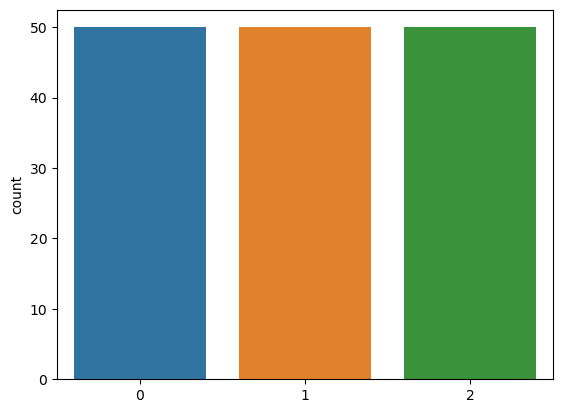

In [6]:
sns.countplot(data=l,x='target')

In [7]:
dataset=pd.DataFrame(np.c_[l['data'],l['target']],columns=np.append(l['feature_names'],['target'])) 
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
a=dataset.iloc[:,:-1].values       #selecting all rows (:) and the first column (:1) & storing it in the variable x           
b=dataset.iloc[:,-1].values        #selecting all rows (:) and the last column (-1) & storing it in the variable y

In [9]:
#training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a,b, test_size=0.3, random_state=0) 

In [10]:
from sklearn.svm import SVC
cls = SVC(kernel='rbf')
cls.fit(x_train,y_train)

SVC()

In [11]:
y_pred=cls.predict(x_test)
y_pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
       2., 1., 0., 2., 1., 1., 2., 0., 2., 0., 0.])

<Axes: >

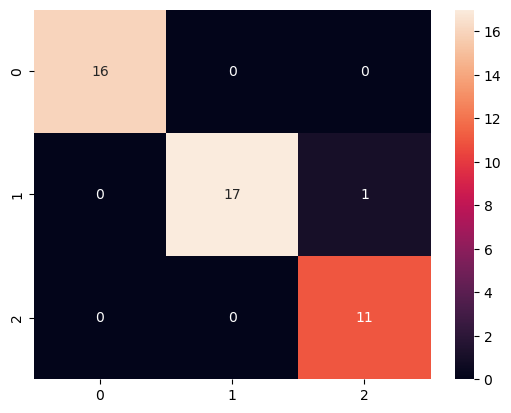

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)             
sns.heatmap(cm, annot=True)

In [13]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [14]:
from sklearn.metrics import recall_score

# Assuming y_test and y_pred are your actual and predicted values for a multiclass classification problem
sensitivity_recall = recall_score(y_test, y_pred, average='micro')

# Now, you can use sensitivity_recall in your analysis or print it
print("Sensitivity (Recall) - Micro:", sensitivity_recall)

Sensitivity (Recall) - Micro: 0.9777777777777777


In [15]:
#using linear kernal,'c'value and gamma value 
#cls = SVC(kernel='poly',C=1,gamma=1)
#cls.fit(x_train,y_train)

In [16]:
#y_pred1=cls.predict(x_test)
#y_pred1
#accuracy_score(y_test,y_pred)